In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from PIL import Image

from sklearn import metrics

import cv2
import os

from glob import glob

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import tensorflow as tf
print(tf.__version__)
!pip install --upgrade tensorflow


2.18.0


In [ ]:
!pip install keras --upgrade


In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
print("TensorFlow version:", tf.__version__)
warnings.filterwarnings('ignore')

TensorFlow version: 2.18.0


In [ ]:
import pandas as pd
df = pd.read_csv("fer2013.csv")

In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)



Current Working Directory: /content


In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Load the dataset
data = pd.read_csv('fer2013.csv')

# Print the first few rows of the dataset
print(data.head())

# Preprocess the data
def preprocess_data(data):
    X = []
    y = []
    for index, row in data.iterrows():
        pixels = row['pixels'].split(' ')
        if len(pixels) == 2304:  # Check if the pixel length is correct
            X.append(np.array(pixels, dtype='float32'))
            y.append(row['emotion'])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], 48, 48, 1)
    X = X / 255.0  # Normalize pixel values
    y = to_categorical(y, num_classes=7)  # One-hot encode the labels
    return X, y

X, y = preprocess_data(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 95s 206ms/step - accuracy: 0.2662 - loss: 1.7890 - val_accuracy: 0.4000 - val_loss: 1.5516
Epoch 2/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 138s 197ms/step - accuracy: 0.3960 - loss: 1.5604 - val_accuracy: 0.4272 - val_loss: 1.4646
Epoch 3/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 145s 204ms/step - accuracy: 0.4245 - loss: 1.4846 - val_accuracy: 0.4667 - val_loss: 1.3820
Epoch 4/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 138s 195ms/step - accuracy: 0.4500 - loss: 1.4196 - val_accuracy: 0.4780 - val_loss: 1.3674
Epoch 5/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 196ms/step - accuracy: 0.4748 - loss: 1.3692 - val_accuracy: 0.4841 - val_loss: 1.3245
Epoch 6/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 93s 206ms/step - accuracy: 0.4889 - loss: 1.3281 - val_accuracy: 0.4897 - val_loss: 1.3084
Epoch 7/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 143s 208ms/step - accuracy: 0.4939 - loss: 1.3131 - val_accuracy: 0.4992 - val_loss: 1.2950
Epoch 8/30
451/451 ━━━━━━━━━━━━━━━━━━━━ 138s 199ms/step - accuracy: 0.5165 - l

In [ ]:
# Save the model to a file
model.save('emotion_recognition_model.keras')

# Load the model (example of how to use it later)
model = load_model('emotion_recognition_model.h5')

In [6]:
import cv2
import numpy as np
from keras.models import load_model
from google.colab import drive

# Load the pre-trained model
model = load_model('/content/drive/MyDrive/emotion_recognition_model.keras')

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

print("success")

# Function to detect faces and predict emotions
def detect_faces_and_predict_emotions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    print(faces)  # Debugging statement

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (48, 48))
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)
        face_roi = face_roi / 255.0

        prediction = model.predict(face_roi)[0]
        print(prediction)  # Debugging statement
        emotion = np.argmax(prediction)
        print(f"Detected Emotion: {emotion}")

# Start webcam feed
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    detect_faces_and_predict_emotions(frame)
    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


success


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import cv2
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_csv("/mnt/data/fer2013.csv")
df = pd.read_csv("fer2013.csv")

# Convert pixels column to numpy arrays
def process_pixels(pixel_string):
    pixels = np.array(pixel_string.split(), dtype=np.uint8)
    # Check if the pixel string has the expected length before reshaping
    if len(pixels) == 2304:  # 48 * 48
        return pixels.reshape(48, 48)
    else:
        # Handle cases where the pixel string has an unexpected length
        # You might want to log these cases, drop them, or impute missing values
        print(f"Warning: Unexpected pixel string length: {len(pixels)}. Skipping this row.")
        return None  # Or handle it differently

df["pixels"] = df["pixels"].apply(process_pixels)

# Remove rows with None values in the 'pixels' column
df = df.dropna(subset=['pixels'])

# Prepare data for training
X = np.array([img.flatten() for img in df["pixels"]])  # Flatten images for ML
y = df["emotion"].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save model
joblib.dump(clf, "emotion_classifier.pkl")

# Load model
clf = joblib.load("emotion_classifier.pkl")

# Emotion labels to emojis
emotion_dict = {
    0: "😡",  # Angry
    1: "🤮",  # Disgust
    2: "😱",  # Fear
    3: "😊",  # Happy
    4: "😢",  # Sad
    5: "😲",  # Surprise
    6: "😐"   # Neutral
}

# Function to detect and display emotion
def detect_emotion(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (48, 48)).flatten().reshape(1, -1)
    prediction = clf.predict(resized)[0]
    return emotion_dict.get(prediction, "❓")

# Real-time camera capture
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    emoji = detect_emotion(frame)
    cv2.putText(frame, emoji, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.imshow("Emotion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report with precision, recall, F1-score
print(classification_report(y_test, y_pred))

# Print a confusion matrix to visualize the performance
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.3548936170212766
              precision    recall  f1-score   support

           0       0.28      0.15      0.19       170
           1       1.00      0.06      0.11        18
           2       0.30      0.21      0.24       165
           3       0.40      0.78      0.53       295
           4       0.27      0.19      0.23       202
           5       0.47      0.33      0.39       113
           6       0.30      0.24      0.26       212

    accuracy                           0.35      1175
   macro avg       0.43      0.28      0.28      1175
weighted avg       0.34      0.35      0.32      1175

[[ 25   0  23  61  24   8  29]
 [  0   1   1  11   2   2   1]
 [ 15   0  34  65  20   9  22]
 [ 11   0  13 231  20   5  15]
 [ 21   0  13  89  39   6  34]
 [  6   0  13  32   7  37  18]
 [ 11   0  18  91  31  11  50]]


In [9]:
import cv2
import numpy as np
from keras.models import load_model

# ... (load model and face cascade as before)
# Load the pre-trained model
model = load_model('/content/drive/MyDrive/emotion_recognition_model.keras')

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

print("success")

# Function to detect faces and predict emotions
def detect_faces_and_predict_emotions(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    print(faces)  # Debugging statement

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (48, 48))
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)
        face_roi = face_roi / 255.0

        prediction = model.predict(face_roi)[0]
        print(prediction)  # Debugging statement
        emotion = np.argmax(prediction)
        print(f"Detected Emotion: {emotion}")

# Load your image
image_path = "/content/drive/MyDrive/image.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

# Detect emotions in the image
detect_faces_and_predict_emotions(image)

faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print("Detected faces:", faces)

# Display the image with predicted emotions
cv2.imshow('Emotion Detection', image)
cv2.waitKey(0)  # Wait until a key is pressed
cv2.destroyAllWindows()

success


error: OpenCV(4.10.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [10]:
from google.colab import drive
drive.mount('/content/drive')

from PIL import Image
img = Image.open("/content/drive/MyDrive/image.jpg")
img.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model and Cascade loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Detected Emotion: 5


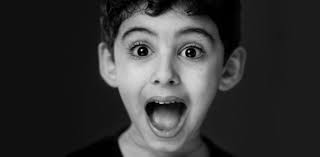

In [1]:
import cv2
import numpy as np
from keras.models import load_model
import os
from google.colab.patches import cv2_imshow  # Import Colab-specific function

# Load the pre-trained model
model_path = "/content/drive/MyDrive/emotion_recognition_model.keras"
if not os.path.exists(model_path):
    print(f"Error: Model file '{model_path}' not found!")
    exit()

model = load_model(model_path)

# Load Haar Cascade for face detection
cascade_path = "/content/drive/MyDrive/haarcascade_frontalface_default.xml"
if not os.path.exists(cascade_path):
    print(f"Error: Haar cascade file '{cascade_path}' not found!")
    exit()

face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    print("Error: Haar cascade classifier not loaded properly!")
    exit()

print("Model and Cascade loaded successfully.")

# Function to detect faces and predict emotions
def detect_faces_and_predict_emotions(image):
    if image is None or image.size == 0:
        print("Error: Image not found or unable to load.")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if gray is None or gray.size == 0:
        print("Error: Grayscale image is empty.")
        return

    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    if len(faces) == 0:
        print("No faces detected.")
        return

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (48, 48))
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)
        face_roi = face_roi / 255.0

        prediction = model.predict(face_roi)[0]
        emotion = np.argmax(prediction)

        print(f"Detected Emotion: {emotion}")

# Load your image
image_path = "/content/drive/MyDrive/image.jpg"

if not os.path.exists(image_path):
    print(f"Error: Image file '{image_path}' not found!")
    exit()

image = cv2.imread(image_path)

# Detect emotions in the image
detect_faces_and_predict_emotions(image)

# Display the image only if it's valid
if image is not None and image.size > 0:
    cv2_imshow(image)  # Use cv2_imshow() instead of cv2.imshow()


In [2]:
import cv2
import numpy as np
from keras.models import load_model

# Load the pre-trained model
model_path = "emotion_recognition_model.keras"  # Update with the correct path
model = load_model(model_path)

# Load Haar Cascade for face detection
cascade_path = "haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    print("Error: Haar cascade classifier not loaded properly!")
    exit()

# Emotion labels (Update based on your trained model's classes)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Open webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    # Read frame from webcam
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image.")
        break

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Extract face ROI
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (48, 48))  # Resize to model input size
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)
        face_roi = face_roi / 255.0  # Normalize pixel values

        # Predict emotion
        prediction = model.predict(face_roi)[0]
        emotion_idx = np.argmax(prediction)
        emotion = emotion_labels[emotion_idx]

        # Display emotion label on video
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw rectangle
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Show the video with face detection
    cv2.imshow("Live Emotion Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


Error: Could not open webcam.
Error: Failed to capture image.


In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Load the model
model_path = "/content/drive/MyDrive/emotion_recognition_model.keras"
model = load_model(model_path)

# Load Haar Cascade
cascade_path = "/content/drive/MyDrive/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(cascade_path)

if face_cascade.empty():
    print("Error: Haar cascade not loaded properly!")
    exit()

# Emotion labels (update according to your model)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load a video file (Replace with your video file path)
video_path = "/content/drive/MyDrive/happy.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Stop if video ends

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face_roi = gray[y:y+h, x:x+w]
        face_roi = cv2.resize(face_roi, (48, 48))
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)
        face_roi = face_roi / 255.0

        prediction = model.predict(face_roi)[0]
        emotion_idx = np.argmax(prediction)
        emotion = emotion_labels[emotion_idx]

        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    from google.colab.patches import cv2_imshow
    cv2_imshow(frame)  # Use cv2_imshow() instead of cv2.imshow()

cap.release()
cv2.destroyAllWindows()
